In [15]:
!pip install fredapi

DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)  # Changed from 'max_columns' to 'display.max_columns'
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred
fred_key = '239478d539d20b2b406f9cb141e9ead1'

<h3> Create the Fred Object

In [17]:
fred = Fred(api_key=fred_key)
fred

<h3> Search For Econmic Data

In [18]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head(2)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-01-06,2025-01-06,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-01-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-01-03 10:46:08-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-01-06,2025-01-06,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-12-31 08:12:02-06:00,88,"For more information regarding the index, plea..."


<h3>Pull Raw Data and plot

In [21]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'SP500'}>

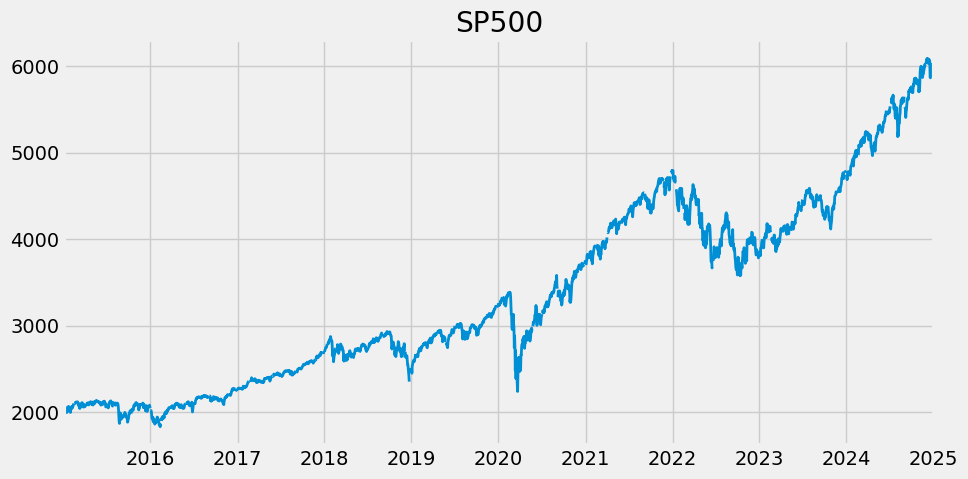

In [26]:
sp500.plot(figsize=(10,5), title='SP500', lw = 2)

<h3> 4. Pull and Join Multiple Data Series

In [28]:
unemployment_result = fred.search('unemployment')
unemployment_result

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-01-06,2025-01-06,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-01-06,2025-01-06,Unemployment Rate,1948-01-01,2024-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-12-06 07:46:03-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-01-06,2025-01-06,Unemployment Level,1948-01-01,2024-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-12-06 07:47:06-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-01-06,2025-01-06,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-01-06,2025-01-06,Continued Claims (Insured Unemployment),1967-01-07,2024-12-21,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-01-02 07:33:04-06:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2025-01-06,2025-01-06,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2025-01-06,2025-01-06,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2025-01-06,2025-01-06,Unemployment Rate - Married Women,1955-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-06 07:47:33-06:00,9,To obtain estimates of women worker employment...


In [29]:
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-07-01    4.3
2024-08-01    4.2
2024-09-01    4.1
2024-10-01    4.1
2024-11-01    4.2
Length: 923, dtype: float64

<Axes: >

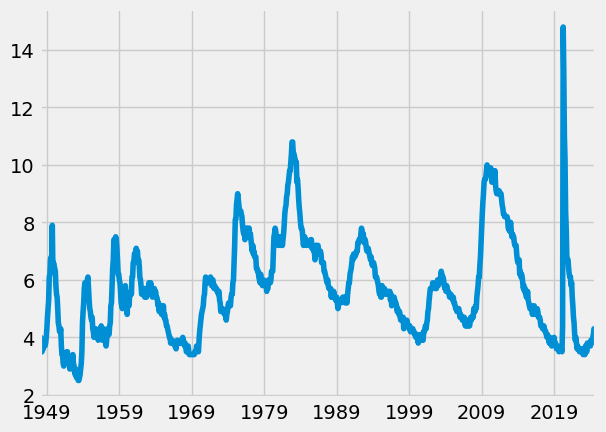

In [30]:
unrate.plot()

In [41]:
unemployment_df = fred.search('unemployment state', filter=('frequency', 'Monthly'))
unemployment_df = unemployment_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]

In [48]:
all_results = []

for myid in unemployment_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)

In [49]:
type(all_results)

list

In [51]:
unemployment_result = pd.concat(all_results, axis=1)
unemployment_result

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,TXUR,LNS14000024,M0892BUSM156SNBR,LNS14000031,NYUR,U2RATE,FLUR,LNS14000002,LNS14000009,LNS14000003,PAUR,OHUR,LNS14000001,MIUR,LNS14027660,ALUR,LNS14027662,MAUR,LNS14024887,ILUR,NCUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,MNUR,SCUR,NMUR,LRUN64TTUSM156S,TNUR,LNS14032183,WAUR,MDUR,ORUR,LNS14000012,LNS14027659,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,NDUR,LASMT261982000000003,MTUR,DCUR,MSUR,LNS14000060,MEUR,NEUR,LNS14000028,CTUR,IDUR,LASMT391746000000003,NHUR,RIUR,KSUR,LNS14000018,WYUR,DEUR,VTUR,LNS14000036,SDUR,LNS14000032,CMWRUR,LNS14200000,LRUN24TTUSM156S,LNS14027689,LNS14100000,LNS14000315,LNS14000029,LNS14024230,CSOUUR,LRUNTTTTUSM156S,LNS14000025,LNS14000061,CNERUR,LNS14000048,CWSTUR,LNS14000026,CNEWUR,LNS14000089,M08311USM156SNBR,LNS14000150,M08320USM156SNBR,LNS14023705,LRHUTTTTUSM156S
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,4.3,6.3,5.2,NaN,4.1,3.9,NaN,6.6,4.3,2.1,3.3,4.1,5.3,3.8,3.4,4.5,4.4,4.4,4.6,2.8,2.3,3.5,9.1,5.2,3.7,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.2,3.9,4.0,4.254796,3.0,3.7,4.9,2.8,4.1,12.4,6.7,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,5.8,4.0,3.9,2.9,2.2,4.5,3.1,5.5,2.7,3.6,2.8,2.6,3.5,3.6,3.5,4.1,2.5,4.5,3.2,13.1,2.9,4.1,2.1,7.7,2.0,5.5,4.0,4.7,9.1,3.5,4.1,2.4,3.4,3.1,3.6,4.3,4.0,3.7,3.9,3.5,4.6,3.8,3.4,4.8,NaN,2.1,NaN,0.5,4.3
2024-08-01,4.2,6.1,5.3,NaN,4.1,3.8,NaN,5.9,4.4,2.0,3.3,4.1,5.5,3.8,3.4,4.5,4.4,4.5,4.0,2.8,2.5,3.7,9.7,5.3,3.8,4.8,3.6,4.0,3.4,2.9,2.8,4.8,3.3,4.3,4.1,4.261322,3.1,4.1,4.8,2.9,4.0,14.1,7.1,4.2,5.5,3.3,3.4,3.9,4.6,2.9,3.3,5.7,4.2,3.9,2.9,2.3,4.5,3.2,5.7,2.7,3.6,2

In [55]:
unemployment_states = unemployment_result.drop('UNRATE', axis=1)
unemployment_states = unemployment_states.dropna()

In [56]:
px.line(unemployment_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})